# O caixeiro com gasolina infinita
### (e sem consciência)

**Experimento da Lista de experimentos disponibilizada no github**

## Introdução

Para esse experimento dado como desafio, vemos `o caixeiro viajante`, resolvido anteriormente no experimento A.06, porém agora ele agora vai segui pelo maior caminho possível entre as cidades que ele passará. 

Nesse sentido, agora é necessário que seja encontrada a maior distância entre que o caixeiro deve percorrer para passar dentre todas as cidades para que ele retorne ao seu ponto incial, ou cidade de partida.

Daí que vem o nome do problema. Esse caixeiro realmente não é nem um pouco consciente de suas ações e o que elas podem causar ao meio ambiente!!!

## Objetivo: 

Encontrar o caminho de *maior* distância no problema do caixeiro viajante e mostrar ele de forma gráfica. Serão consideradas 5 cidades e nenhuma delas pode ser visitada novamente.

**Considerações a se fazer:** Considere um número $n\geq 7$ de coordenadas $(x,y)$ de cidades e que o caixeiro tenha combustível infinito. Você pode gerar as coordenadas de forma aleatória ou simplesmente usar as coordenadas que desejar. O caixeiro só anda em linha reta e apenas entre duas cidades. O caixeiro começa e termina seu trajeto na mesma cidade e, fora a cidade inicial, ele não visita nenhuma outra cidade mais de uma vez.

### Importações

In [1]:
import random
from itertools import permutations

from funcoes import cria_cidades
from funcoes import populacao_inicial_cv as cria_pop_inicial
from funcoes import funcao_objetivo_pop_cv
from funcoes import funcao_objetivo_cv
from funcoes import selecao_torneio_max as funcao_selecao   # já temos
from funcoes import cruzamento_ordenado as funcao_cruzamento
from funcoes import mutacao_de_troca as funcao_mutacao

### Códigos e Discussão

In [2]:
cidades = cria_cidades(5)

cidades

nomes = list(cidades.keys())
nomes
random.shuffle(nomes)
nomes

['Cidade 2', 'Cidade 0', 'Cidade 1', 'Cidade 3', 'Cidade 4']

In [3]:
### CONSTANTES

# relacionadas à busca
TAMANHO_POP = 50
NUM_GERACOES = 3000
CHANCE_CRUZAMENTO = 0.5
CHANCE_MUTACAO = 0.05
NUM_COMBATENTES_NO_TORNEIO = 3

# relacionadas ao problema a ser resolvido
NUM_CIDADES = 5
CIDADES = cria_cidades(NUM_CIDADES)

In [4]:
# Funções locais

def func_obj_pop(populacao):
    return funcao_objetivo_pop_cv(populacao, CIDADES)

def func_obj_individuo(individuo):
    return funcao_objetivo_cv(individuo, CIDADES)

In [5]:
# Busca por algoritmo genético

populacao = cria_pop_inicial(TAMANHO_POP, CIDADES)

melhor_fitness_ja_visto = -float("inf")  # é assim que escrevemos infinito em python

for n in range(NUM_GERACOES):
    
    # Seleção
    fitness = func_obj_pop(populacao)
    populacao = funcao_selecao(populacao, fitness)
    
    # Cruzamento
    pais = populacao[0::2]
    maes = populacao[1::2]
    
    contador = 0
    
    for pai, mae in zip(pais, maes):
        if random.random() <= CHANCE_CRUZAMENTO:
            filho1, filho2 = funcao_cruzamento(pai, mae)
            populacao[contador] = filho1
            populacao[contador + 1] = filho2
        
        contador = contador + 2   
        
    # Mutação
    for n in range(len(populacao)):
        if random.random() <= CHANCE_MUTACAO:
            individuo = populacao[n]
            populacao[n] = funcao_mutacao(individuo)            
            
    # melhor individuo já visto até agora
    fitness = func_obj_pop(populacao)
    maior_fitness = max(fitness)
    if maior_fitness > melhor_fitness_ja_visto:        
        posicao = fitness.index(maior_fitness)
        melhor_individuo_ja_visto = populacao[posicao]
        melhor_fitness_ja_visto = maior_fitness  

In [6]:
# Busca testando todas as permutações

melhor_fitness_ever = -float("inf")

# testando todas as permutações possíveis
for caminho in permutations(list(CIDADES.keys())):
    distancia = func_obj_individuo(caminho)
    if distancia > melhor_fitness_ever:
        melhor_fitness_ever = distancia
        melhor_resposta_ever = caminho

In [7]:
# Checando os resultados

print()
print("Melhor individuo obtido por algoritmos genéticos:")
print(melhor_individuo_ja_visto, "com distância:", melhor_fitness_ja_visto)

print()
print("Melhor individuo obtido por busca exaustiva:")
print(melhor_resposta_ever, "com distância:", melhor_fitness_ever)


Melhor individuo obtido por algoritmos genéticos:
['Cidade 0', 'Cidade 2', 'Cidade 1', 'Cidade 3', 'Cidade 4'] com distância: 3.859471909427439

Melhor individuo obtido por busca exaustiva:
('Cidade 0', 'Cidade 2', 'Cidade 4', 'Cidade 3', 'Cidade 1') com distância: 3.859471909427439


### Representação gráfica

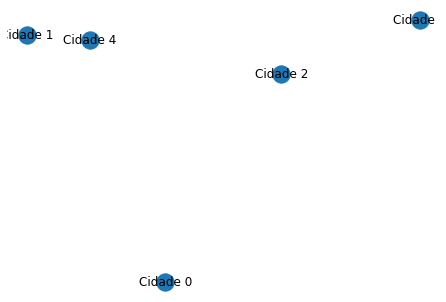

In [12]:
# montando o grafo
G = nx.Graph()

for cidade in cidades:    
    x = cidades[cidade][0]
    y = cidades[cidade][1]
    G.add_node(cidade, pos=(x, y))
    
pos = nx.get_node_attributes(G, 'pos')
    
nx.draw(G, pos, with_labels=True)

### Conclusão

Este desafio passado para resolução, foi proposto com o intuito de utilizar dos aprendizados das aulas para resolver um problema presente na lista de experimentos, presente nesta mesma pasta. Da mesma forma que o experimento A.06 foi resolvido na aula anterior, este aqui se utiliza das mesmas ideias, porém com leves modificações que fazem bastante diferença. Os módulos requeridos para o experimento eram: `permutations` de `itertools` e `random`.

Com o objetivo de encontrar o maior caminho a ser percorrido pelo caixeiro, o algoritmo agora deve selecionar apenas os indivíduos que utilizam a maior distância para fazer sua viagem do nosso amigo sem consciência, passando por todas as cidades, conforme suas gerações vão passando. Importante ressaltar que os valores de melhor indivíduo obtido sempre darão valores diferentes a cada vez que o código for rodado, já que cidades e caminhos novos são recriados para cada vez que o algoritmo rodar. As mudanças realizadas no código foram poucas, comparados ao caixeiro com distância mínima, uma vez que bastou inverter os sinais de "menor que" e do `float` infinito, além de mandar o algoritmo buscar o fitness máximo em `max(fitness)`.

Por fim, também foi feita uma análise com relação à busca exaustiva para ver se os valores obtidos eram iguais. 

**OBS:** Antes de modificar o `min(fitness)` para `max(fitness)`, os valores ficavam diferentes.